In [3]:
!pip install pandas transformers faiss-gpu matplotlib openpyxl scikit-learn



Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  distutils: /home/uceehuf/.local/lib/python3.9/site-packages
  sysconfig: /home/uceehuf/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None


In [3]:
pip install faiss-gpu

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/uceehuf/.local/lib/python3.9/site-packages
sysconfig: /home/uceehuf/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Loading policy from Excel
df = pd.read_excel('Policy.xlsx')
policy_scripts = df['Policy Scripts'].tolist()

print(policy_scripts[5])


Public Transport
Journeys made on rail, bus, ferry, river boat, underground, metro or tram services – can be claimed.
The most economical method of travel should be used. For example, if the claimant uses public transport in London regularly, they should use an Oyster card rather than paying for single journeys by cash.


In [4]:

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Embedding vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(policy_scripts).toarray()

# Convert to float32 for FAISS compatibility
X = np.array(X, dtype='float32')

print(X[5])

[0. 0. 0. ... 0. 0. 0.]


In [5]:
import faiss

# initialise with the dimension of the vectors
d = X.shape[1]

# Add index
index = faiss.IndexFlatL2(d)
index.add(X)

In [6]:
# make a Query
query_text = "Does GNEI provide travel insurance?"
query_vector = vectorizer.transform([query_text]).toarray()
query_vector = np.array(query_vector, dtype='float32')

# Searching the index
k = 5  # Number of nearest neighbors
distances, indices = index.search(query_vector, k)

print("Distances:", distances.flatten())
print("Indices:", indices.flatten())


Distances: [1.0714213 1.5596337 1.5722091 1.575973  1.6754932]
Indices: [ 4 45 11 18  2]


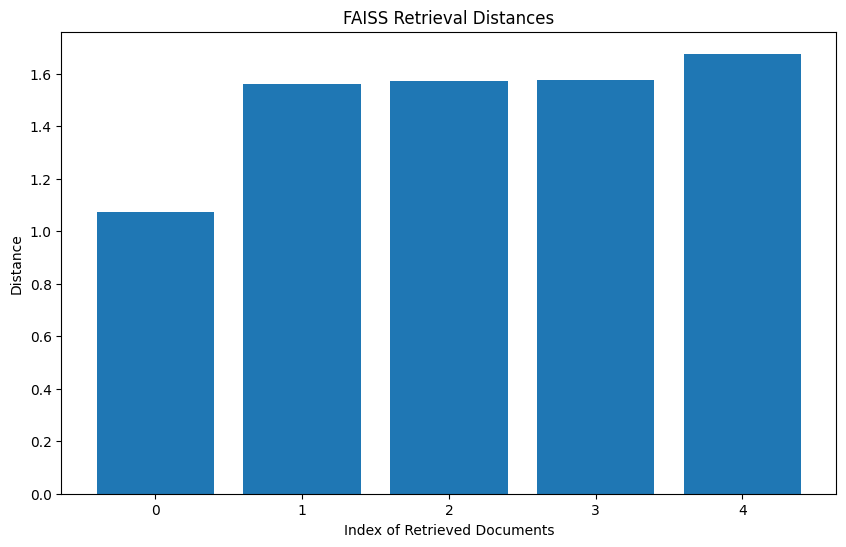

### Retrieved Document:
 Travel Insurance
Travel Insurance needs to be activated before traveling overseas, travelling in the UK for fieldtrips or travelling on a business trip where there is an overnight stay or air travel involved.
Insurance can be activated by completing a travel insurance request form, which can be found in the Insurance Section on the Finance website.
The Insurance team will issue a cover note and provide details of the policy. There is no cost to departments for travel insurance. For regular travellers the Insurance Section can issue annual cover notes on request.
If a claimant has an existing medical condition and is not travelling against their doctors’ orders, this is covered by the GNEI Travel Insurance Policy at no extra cost.
Personal travel insurance cannot be claimed as GNEI already provides cover for business travel, please refer to Annex 2 for further information on this exclusion.
### Retrieved Document:
 Annex 2 – Exclusions
In exceptional circumstanc

In [9]:
import matplotlib.pyplot as plt

# Retrieve and plot the distances
plt.figure(figsize=(10, 6))
plt.bar(range(k), distances[0])
plt.title('FAISS Retrieval Distances')
plt.xlabel('Index of Retrieved Documents')
plt.ylabel('Distance')
plt.show()

# Print the actual documents
for idx in indices[0]:
    print("### Retrieved Document:\n", policy_scripts[idx])
